821
[[6.89579518e-15 0.00000000e+00 1.18952467e-13 ... 0.00000000e+00
  6.34413157e-14 0.00000000e+00]
 [7.41136866e-15 0.00000000e+00 1.89781714e-14 ... 0.00000000e+00
  5.69345141e-14 0.00000000e+00]
 [8.46567575e-15 0.00000000e+00 1.75771619e-14 ... 0.00000000e+00
  1.77891529e-14 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.47027880e+00 ... 0.00000000e+00
  1.01214575e+01 5.88235294e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.76190476e+00
  0.00000000e+00 7.14285714e+00]
 [9.29854803e-15 0.00000000e+00 1.47255479e-13 ... 0.00000000e+00
  9.23395321e-15 0.00000000e+00]]
overall
0.024161801432848646
0.4882869371983088
0.018282009467140942
1.6034493479151573
11.162959028515779
0.037131198906142214


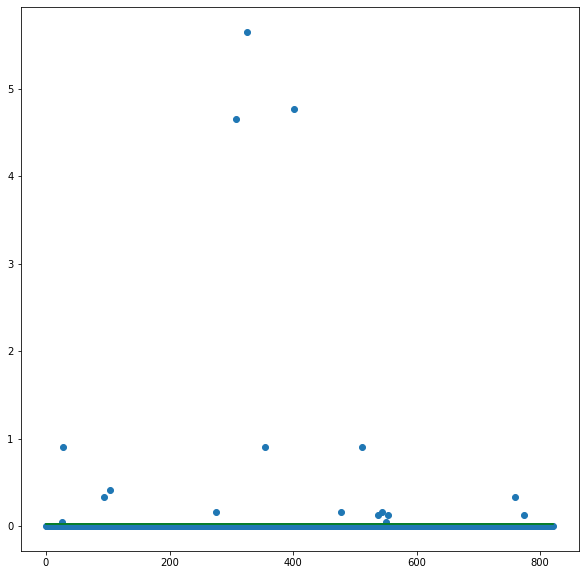

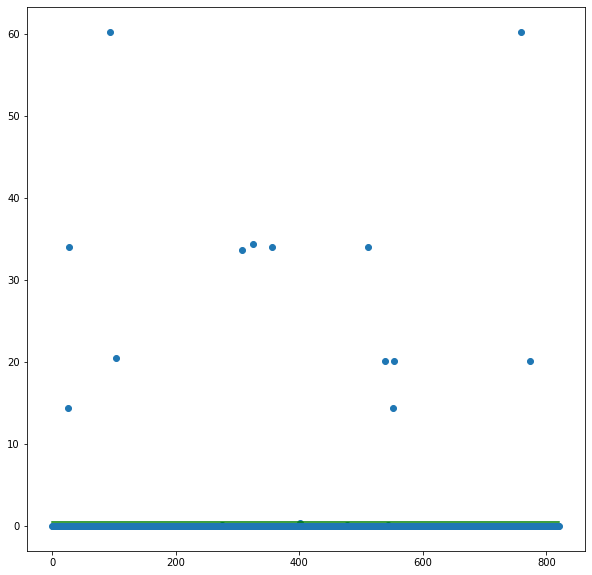

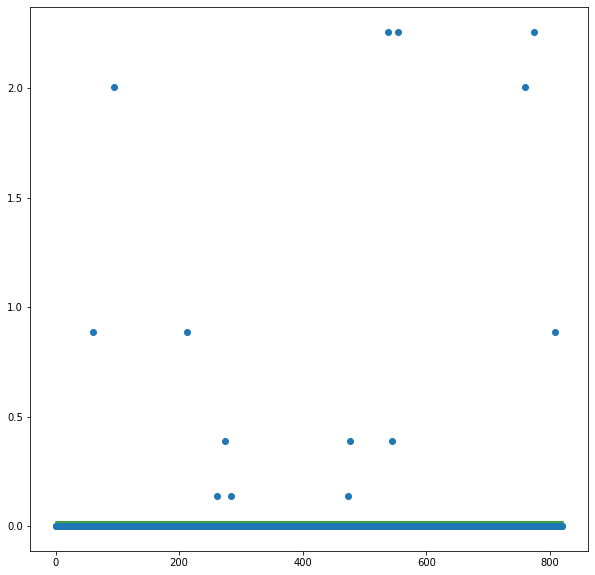

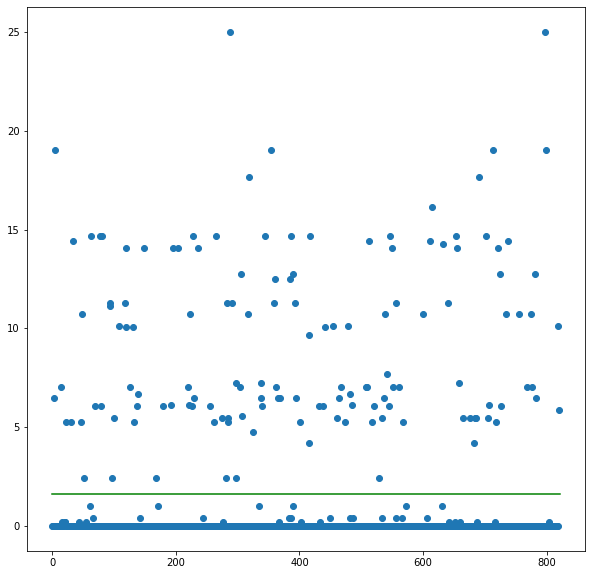

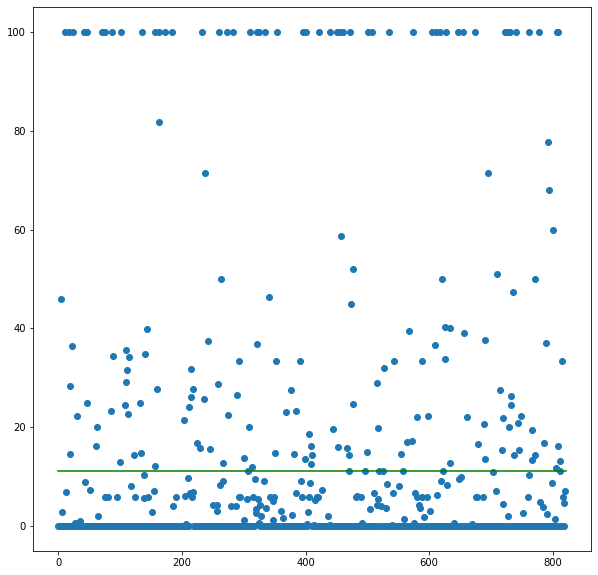

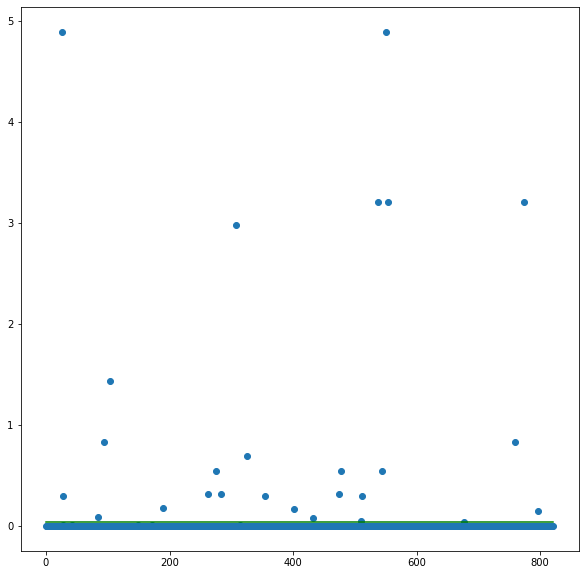

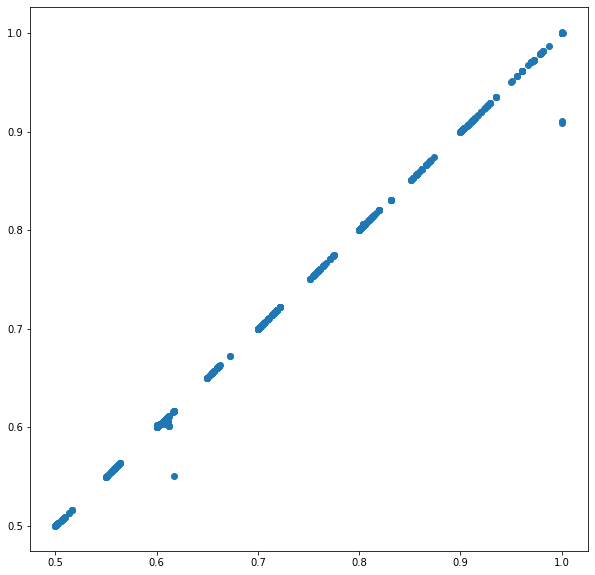

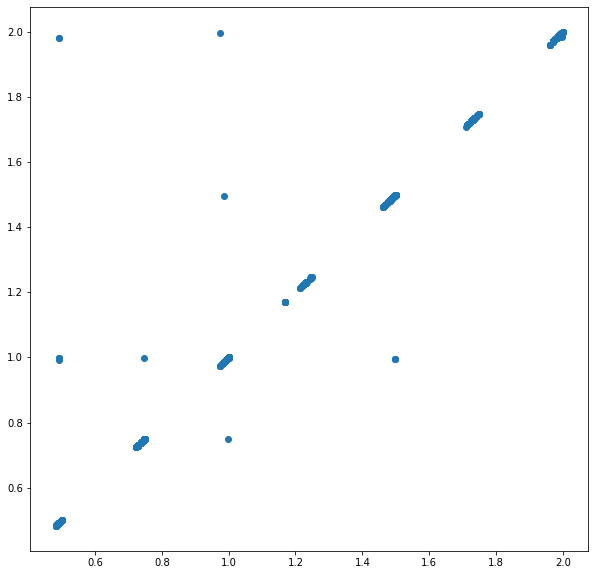

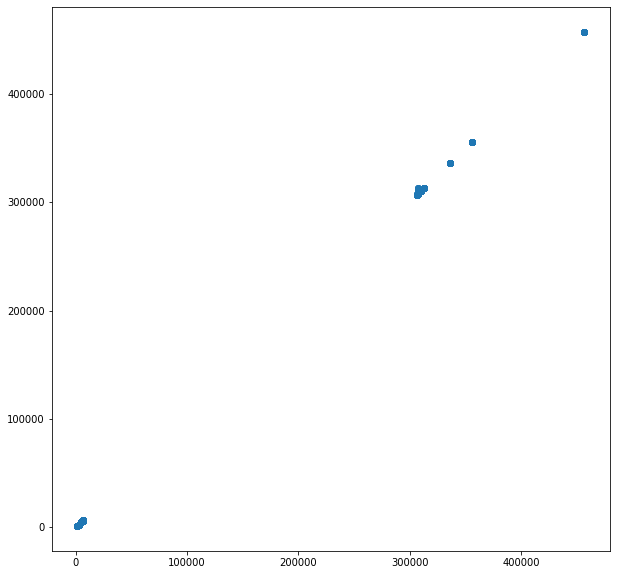

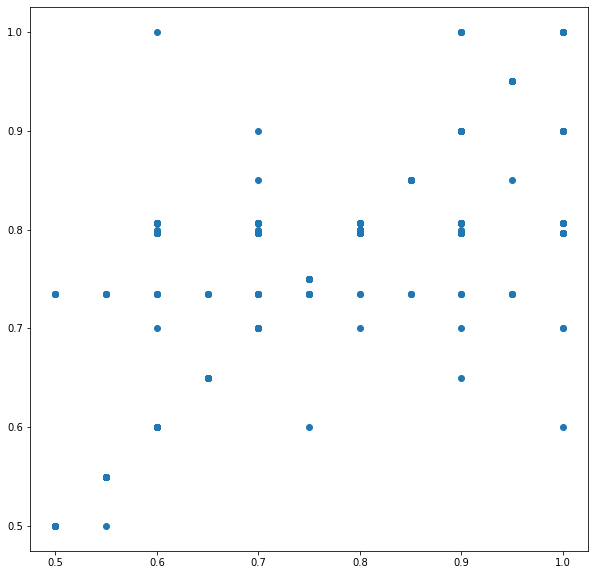

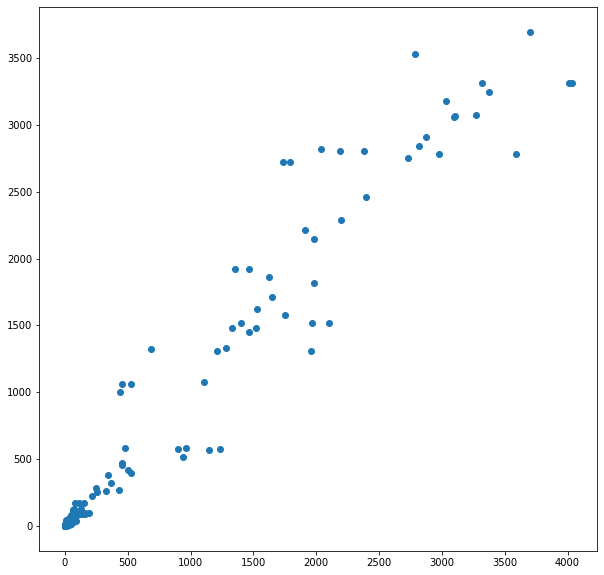

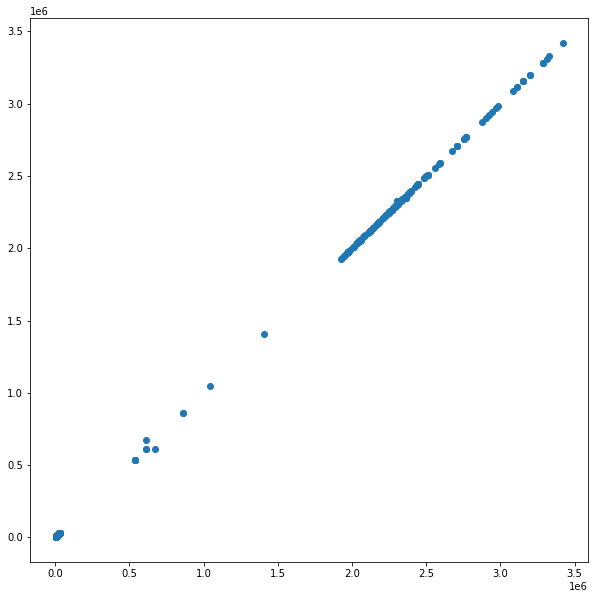

In [1]:
#Decision tree regressor
from sklearn.neighbors import KNeighborsRegressor
# linear regression for multioutput regression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas
from sklearn.svm import LinearSVR
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xlwt 
from xlwt import Workbook 

wb = Workbook() 


def drawCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 
  plt.plot([0,len(y)],[np.mean(y),np.mean(y)],color = 'g')
  #plt.plot(x,y,marker ='o') # for changing it to scatter plt.scatter() and keep the s which is point size
  
  #plt.savefig('coreUvsDrc.pdf', bbox_inches = 'tight')


def drawRocCurve(x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(x,y) 

dataframe = pandas.read_excel('/content/datasetOrginal1.xlsx')


asr = dataframe['aspectratio'].tolist()
tArea = dataframe['totalarea'].tolist()
tWlen = dataframe['twirelen'].tolist()
cLkp = dataframe['clkperiod'].tolist()
drc = dataframe['drc'].tolist()
coreU = dataframe['coreutil'].tolist()


yOut = []
for i in range(len(asr)):
  yOut.append([coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]])




df = dataframe.drop('aspectratio', axis=1)
df = df.drop('totalarea', axis=1)
df = df.drop('twirelen', axis=1)
df = df.drop('clkperiod', axis=1)
df = df.drop('drc', axis=1)
df = df.drop('coreutil', axis=1)

X = df.values
xTrain = []
xTest = []
yTrain = []
yTest = []

xTrain, xTest, yTrain, yTest = train_test_split(X, yOut, test_size=0.30, random_state=42)

print(len(yTest))

sheet1 = wb.add_sheet('PredOne') 
sheet2 = wb.add_sheet('ActualOne')

model = DecisionTreeRegressor()
model.fit(xTrain,yTrain)




yHat = model.predict(xTest)

errorArray = np.zeros([6,len(yHat)])


#print(len(yHat))
for i in range(6):
  sum1,sum2 = 0,0
  c = 0
  for j in range(0,len(yHat)):
    predOne = np.array(yHat).T[i][j]
    actualOne = np.array(yTest).T[i][j]

    #print(str(predOne)+"------>"+str(actualOne))

    # print(predOne)

    sheet1.write(j,i,str(predOne))
    sheet2.write(j,i,str(actualOne))
   

    if predOne == actualOne:
      errorArray[i][j] = 0
    
    else:
      sum1 = np.abs(np.abs(predOne)-actualOne)
      sum2 = (actualOne+ np.abs(predOne))
      sum = sum1/sum2
      errorArray[i][j] = sum*100
  
  
  

wb.save('output.xls') 
print(errorArray)
print('overall')
#print(np.mean(accuracy))
#[coreU[i],asr[i],tArea[i],cLkp[i],drc[i],tWlen[i]]
sampleNo = [i for i in range(len(yHat))]
for i in range(6):
  drawCurve(sampleNo,list(errorArray[i]))


for i in range(6):
  print(np.mean(list(errorArray[i])))


plot_yHat = yHat.T
plot_yTest = np.array(yTest).T

for i in range(6):
  drawRocCurve(plot_yTest[i],plot_yHat[i])

#Error percentage

# for i in range(len(yHat)):
#   output = ""
#   for j in range(6):
#     calculation = ((yHat[i][j]-yTest[i][j])/yTest[i][j])*100
#     output += str("{:.2f}".format(calculation))+"  "
  
#   print(output)




# overall
# 0.034022236518643605
# 0.6000635542621284
# 0.03532472871419937
# 0.06418293423155867
# 10.861262902897671
# 0.029047691307093636

In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas

import numpy as np


row,col = 6,len(yOut)
arr = np.zeros((row, col)) 
x_t = np.zeros((row, col)) 





x_t = np.array(yOut).T
print('hmm')
print(x_t)



# f = open("demofile3.txt", "w")
# x_t = x_t.T

# for i in range(len(x_t)):
#   for j in range(len(x_t[i])):
#     f.write(str(x_t[i][j])+"\t")
#   f.write('\n')



hmm
[[8.03000000e-01 9.02000000e-01 1.00000000e+00 ... 8.51000000e-01
  9.03000000e-01 9.51000000e-01]
 [4.98000000e-01 4.99000000e-01 5.00000000e-01 ... 9.99000000e-01
  9.97000000e-01 9.99000000e-01]
 [3.13209112e+05 3.13209112e+05 3.13209112e+05 ... 3.55777232e+05
  3.55777232e+05 3.55777232e+05]
 [7.00000000e-01 8.00000000e-01 9.00000000e-01 ... 8.00000000e-01
  8.50000000e-01 9.00000000e-01]
 [1.37000000e+02 1.35400000e+03 2.13400000e+03 ... 1.47800000e+03
  1.73800000e+03 3.37300000e+03]
 [2.05473120e+06 1.98593669e+06 1.90782816e+06 ... 2.32463899e+06
  2.33545820e+06 2.28698373e+06]]


In [3]:
#15 grapharr
from numpy import random
import matplotlib.pyplot as plt 
import numpy as np
import xlwt 
from xlwt import Workbook 
import time 

ultimateSol = []



print(x_t)

ultimatepair = []




for j in range(len(x_t[0])):
  ultimatepair.append([x_t[0][j],x_t[1][j],x_t[2][j],x_t[3][j],x_t[4][j],x_t[5][j]])



print(ultimatepair)

Sol1 = ultimatepair
#Sol1 = sorted(Sol1,key=lambda x: (x[2],x[1]),reverse=False)

print(Sol1)

wb = Workbook() 
sheet = wb.add_sheet('sheet') 


play = []




#This one we want to improve
# coreu, asr, area , clkp, drc , wire len
improving = [0.853,  0.498, 355777.232234,0.8,2058.0,2291189.03]
timeAvg = []


#this function for calculating run time and it also calculates the optimization
def fun():
  start = time.time()
  pair = []
  for j in range(len(Sol1)):
    com1 = (Sol1[j][2]/improving[2])
    com2 = (Sol1[j][4]/improving[4])
      #if condition is written based on our constraints
    if .85*improving[2] <= Sol1[j][2] and 1.15*improving[2] >= Sol1[j][2] and com2<1 and com1<1 and Sol1[j][5] <= improving[5] and Sol1[j][4]<=200:

      corj = Sol1[j][0]
      asrj = Sol1[j][1]
      areaj = Sol1[j][2]
      clkj = Sol1[j][3]
      drcj = Sol1[j][4]
      wirej = Sol1[j][5]
      cori = improving[0]
      asri = improving[1]
      areai = improving[2]
      clki = improving[3]
      drci = improving[4]
      wirei = improving[5]
      pair.append([cori,asri,areai,clki,drci,wirei,corj,asrj,areaj,clkj,drcj,wirej])


  latestSol = sorted(pair,key=lambda x: (x[11],x[10],x[8],x[9]),reverse=False)
  # Sorting is done based on our constraint

  writing = latestSol[0]

  timeAvg.append(time.time()-start)

  return writing,latestSol

# 100 times run for having 100 values of runtime which is latere averaged
for i in range(100):
  writing,latestSol = fun()


print(timeAvg)

print(np.mean(timeAvg))


#All possible solution
for i in range(len(latestSol)):
  print(latestSol[i])

writing = latestSol[0]
r=0
for i in range(len(writing)):
  sheet.write(r,i,writing[i])



wb.save('over.xls')





[[8.03000000e-01 9.02000000e-01 1.00000000e+00 ... 8.51000000e-01
  9.03000000e-01 9.51000000e-01]
 [4.98000000e-01 4.99000000e-01 5.00000000e-01 ... 9.99000000e-01
  9.97000000e-01 9.99000000e-01]
 [3.13209112e+05 3.13209112e+05 3.13209112e+05 ... 3.55777232e+05
  3.55777232e+05 3.55777232e+05]
 [7.00000000e-01 8.00000000e-01 9.00000000e-01 ... 8.00000000e-01
  8.50000000e-01 9.00000000e-01]
 [1.37000000e+02 1.35400000e+03 2.13400000e+03 ... 1.47800000e+03
  1.73800000e+03 3.37300000e+03]
 [2.05473120e+06 1.98593669e+06 1.90782816e+06 ... 2.32463899e+06
  2.33545820e+06 2.28698373e+06]]
[[0.802999999999999, 0.498, 313209.11223, 0.7, 137.0, 2054731.2], [0.902, 0.499, 313209.11223, 0.8, 1354.0, 1985936.69], [1.0, 0.5, 313209.11223, 0.9, 2134.0, 1907828.16], [0.6, 0.5, 313209.11223, 1.0, 19.0, 2266122.1], [0.7, 0.5, 313209.11223, 0.6, 58.0, 2162378.0], [0.802999999999999, 0.498, 313209.11223, 0.7, 79.0, 2054731.2], [0.902, 0.499, 313209.11223, 0.8, 707.0, 1985936.69], [1.0, 0.5, 313209.1

In [4]:
#For future use


start = time.time()
improving = [0.853,  0.498, 355777.232234,0.8,2058.0,2291189.03]
pair = []
for j in range(len(Sol1)):
  com1 = (Sol1[j][2]/improving[2])
  com2 = (Sol1[j][4]/improving[4])
    #cor clk drc area
  if .85*improving[2] <= Sol1[j][2] and 1.15*improving[2] >= Sol1[j][2] and com2<1 and com1<1 and improving[0] < Sol1[j][0] and Sol1[j][4]<=200:

    corj = Sol1[j][0]
    asrj = Sol1[j][1]
    areaj = Sol1[j][2]
    clkj = Sol1[j][3]
    drcj = Sol1[j][4]
    wirej = Sol1[j][5]
    cori = improving[0]
    asri = improving[1]
    areai = improving[2]
    clki = improving[3]
    drci = improving[4]
    wirei = improving[5]
    pair.append([cori,asri,areai,clki,drci,wirei,corj,asrj,areaj,clkj,drcj,wirej])


latestSol = sorted(pair,key=lambda x: (x[6],1/x[10],1/x[8],1/x[11]),reverse=True)

writing = latestSol[0]

print(time.time()-start)
for i in range(len(latestSol)):
  print(latestSol[i])

writing = latestSol[0]
r=0
for i in range(len(writing)):
  sheet.write(r,i,writing[i])


0.003591299057006836
[0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03, 0.903, 0.498, 336415.228707, 0.8, 41.0, 2040688.31]
[0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03, 0.903, 0.498, 336415.228707, 0.8, 51.0, 2040688.31]
[0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03, 0.903, 0.498, 336415.228707, 0.8, 89.0, 2040688.31]
[0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03, 0.900999999999999, 1.0, 336415.228707, 0.8, 46.0, 2060405.14]
[0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03, 0.900999999999999, 1.0, 336415.228707, 0.8, 49.0, 2060405.14]
[0.853, 0.498, 355777.232234, 0.8, 2058.0, 2291189.03, 0.900999999999999, 1.0, 336415.228707, 0.8, 81.0, 2060405.14]


Exception: ignored

In [ ]:
# we use this function for our work

l=[[1,4],
[2,7],
[10,1],
[1,2],
[10,6],
[2,1]]
print(sorted(l,key=lambda x: (x[0],x[1]))) 

[[1, 2], [1, 4], [2, 1], [2, 7], [10, 1], [10, 6]]


In [ ]:
# Writing to an excel 
# sheet using Python 


# add_sheet is used to create sheet. 



In [ ]:
counter = 0
for i in range(6):
  for j in range(i+1,6):
    if i!= j:
      counter+=1
      print(str(i)+" "+str(j))


print(counter)
     

0 1
0 2
0 3
0 4
0 5
1 2
1 3
1 4
1 5
2 3
2 4
2 5
3 4
3 5
4 5
15
